# Pandas Lab Assignment - Diamonds

The following csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension <br>

Read the file and find the following:

1. Drop the unnamed column from the dataset once you read it  
2. The occurences of all unique colors of diamonds, bar chart of the same.     
3. Average price of each cut of diamond.  
4. Find the volume of every diamond and store it in a new column in the dataset. (volume = x*y*z)   
5. Histograms of Price and depths colums as two separate plots  
6. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.  
7. Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only  
8. Which clarity(i.e the category) diamond has maximum mean depth?  
9. Find the diamond(i.e row) with minimum price per volume

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


1.Drop the unnamed column from the dataset once you read it

In [2]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2.The occurences of all unique colors of diamonds, bar chart of the same.

In [4]:
u=df['color'].unique()
df['color'].value_counts().plot(kind='bar')


3.Average price of each cut of diamond.

In [5]:
df.groupby(['cut']).mean().price
# datapricecut=df[['cut','price']]

# for name,value in datapricecut.groupby(['cut']):
#     print("Average price of {0} is {1}".format(name,value['price'].mean()))

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

4.Find the volume of every diamond and store it in a new column in the dataset. (volume = xyz)

In [6]:
df['Volume'] = df['x']*df['y']*df['z']

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


5.Histograms of Price and depths colums as two separate plots

(array([3.0000e+00, 0.0000e+00, 1.1000e+01, 2.6800e+02, 1.2078e+04,
        4.0363e+04, 1.1320e+03, 7.8000e+01, 4.0000e+00, 3.0000e+00]),
 array([43. , 46.6, 50.2, 53.8, 57.4, 61. , 64.6, 68.2, 71.8, 75.4, 79. ]),
 <a list of 10 Patch objects>)

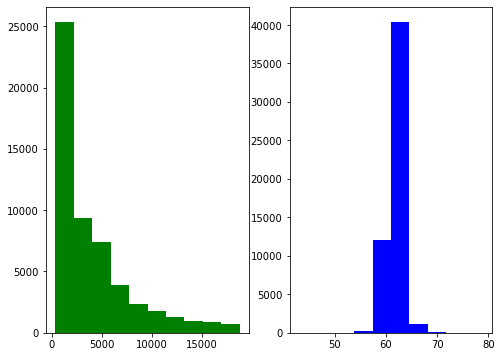

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.hist(df['price'],color='g')
plt.subplot(1,2,2)
plt.hist(df['depth'],color='b')


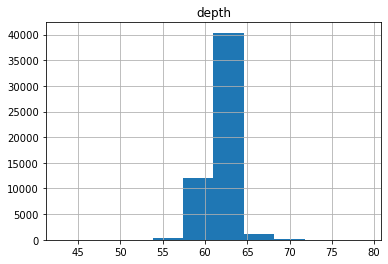

In [8]:
hist = df.hist(column='depth')


6 scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.

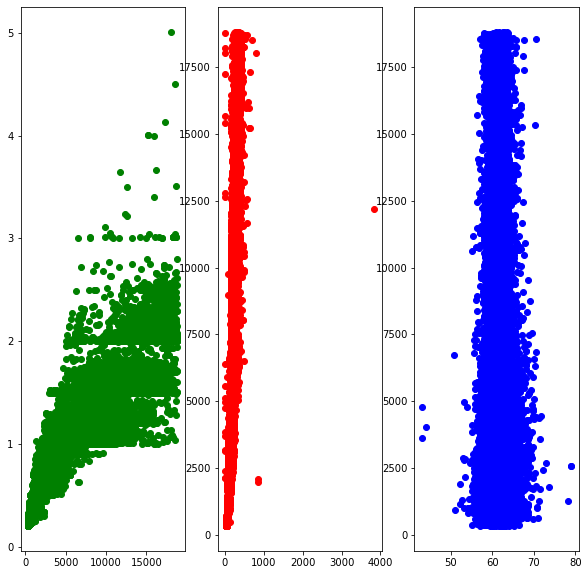

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.scatter(df['price'],df['carat'],color='g')
plt.subplot(1,3,2)
plt.scatter(df['Volume'],df['price'],color="r")

plt.subplot(1,3,3)
plt.scatter(df['depth'],df['price'],color='b')


7 Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only

In [16]:
color_mapping={'D':0,'E':1,'F':2,'H':3,'I':4,'J':5,'G':6}
df['color'].unique()
df['color']=df['color'].apply(lambda x:color_mapping[x])



array([1, 4, 5, 3, 2, 6, 0], dtype=int64)

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume,price_per_vol
0,0.23,Ideal,1,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,8.533578
1,0.21,Premium,1,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,9.447672
2,0.23,Good,1,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,8.587887
3,0.29,Premium,4,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,7.148272
4,0.31,Good,5,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,6.452576


8 Which clarity(i.e the category) diamond has maximum mean depth?

In [19]:
max_depth=df.groupby(['clarity']).clarity.max()

print(max_depth[0],"has maximum depth")


I1 has maximum depth


9 Find the diamond(i.e row) with minimum price per volume

In [20]:
df['price_per_vol'] = df['price']/df['Volume']
print('minimum price per volume is: ',df['price_per_vol'].min())
pv=df.loc[df['price_per_vol'].idxmin()]

print(pv)

minimum price per volume is:  2.34942678756793
carat                 0.51
cut              Very Good
color                    1
clarity                VS1
depth                 61.8
table                 54.7
price                 1970
x                     5.12
y                     5.15
z                     31.8
Volume             838.502
price_per_vol      2.34943
Name: 48410, dtype: object
